# Posttest 6 - Supervised Learning
## Gempar Panggih Dwi Putra
## NIM 2009106022
## Unsupervised Learning
### Di posttest ini saya ganti dataset dari Employee Promotion menjadi Wine Quality

# IMPORT

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 

In [13]:
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('WineQT.csv')
df.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.9965,3.19,0.82,9.6,5,140
96,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.9916,3.68,0.79,14.0,6,142
97,6.3,0.390,0.08,1.7,0.066,3.0,20.0,0.9954,3.34,0.58,9.4,5,143
98,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.9916,3.68,0.79,14.0,6,144


# INFO

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [16]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


# Membuat dataframe dan mengambil attribut pH dan Alkohol sebagai kolom

In [18]:
from sklearn.preprocessing import StandardScaler

df_subset = df[["pH","alcohol"]]

ss = StandardScaler()
x_scaled = ss.fit_transform(df_subset)

# Model Algoritma K-MEANS 

## Membuat Objek K MEANS dengan jumlah cluster 5

In [19]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)

## Melakukan FIT terhadap Model

In [20]:
model.fit(x_scaled)
labels = model.labels_
print(labels)

[2 4 1 ... 2 2 2]


## Membuat Label dan menunjuk attribut quality sebagai target

In [21]:
dfKmeans = pd.DataFrame({'labels': labels, 
                         'Quality': df.quality})
ct1 = pd.crosstab(dfKmeans["labels"],
                 dfKmeans["Quality"])
print(ct1)

Quality  3   4    5    6   7   8
labels                          
0        0   2   27  119  78  12
1        2  11  196  107  10   1
2        3   9  115  107  20   0
3        0   6   15   50  21   2
4        1   5  130   79  14   1


## Visualisasi Data

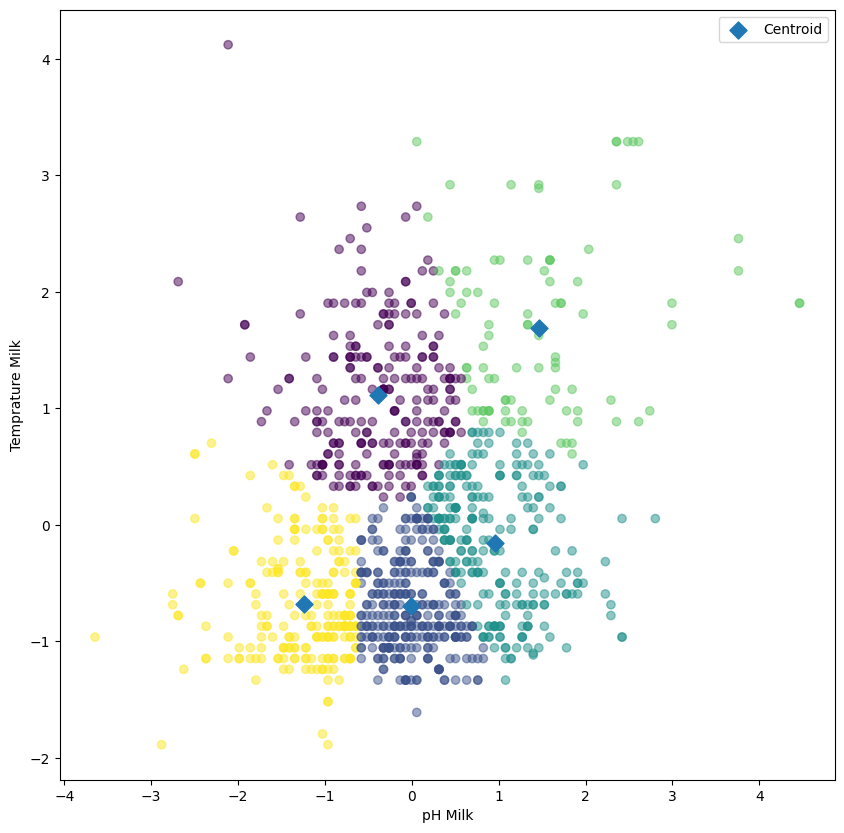

In [22]:
# Memngambil semua baris dan kolom kemudian menaruhnya dalam bentuk array
xs = x_scaled[:,0]
ys = x_scaled[:,1]

centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Visualisasi Cluster
plt.figure(figsize=(10,10))

# Data point
plt.scatter(xs,ys,
            alpha=0.5,c=labels)

# Centroid point
plt.scatter(centroids_x,centroids_y,
            marker="D",s=75,label="Centroid")

plt.xlabel("pH Milk")
plt.ylabel("Temprature Milk")
plt.legend()
plt.show()